<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [4]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [5]:
# Answer:
movies.shape

(979, 6)

In [6]:
movies.index

RangeIndex(start=0, stop=979, step=1)

In [7]:
movies.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

#### Check the data type of each column.

In [8]:
# Answer:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [9]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [10]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [11]:
# Answer:
movies.sort_values(by='duration',inplace=True)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


In [12]:
movies.tail()

,star_rating,title,content_rating,genre,duration,actors_list
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [13]:
movies.describe(include='all')

,star_rating,title,content_rating,genre,duration,actors_list
count,979.000000,979,976,979,979.000000,979
unique,NaN,975,12,16,NaN,969
top,NaN,Les Miserables,R,Drama,NaN,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,NaN,2,460,278,NaN,6
mean,7.889785,NaN,NaN,NaN,120.979571,NaN
std,0.336069,NaN,NaN,NaN,26.218010,NaN
min,7.400000,NaN,NaN,NaN,64.000000,NaN
25%,7.600000,NaN,NaN,NaN,102.000000,NaN
50%,7.800000,NaN,NaN,NaN,117.000000,NaN
75%,8.100000,NaN,NaN,NaN,134.000000,NaN


#### Create a histogram of duration, choosing an "appropriate" number of bins.

<AxesSubplot:>

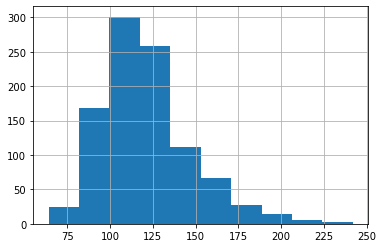

In [14]:
# Answer:
movies.duration.hist(bins=10)

<AxesSubplot:>

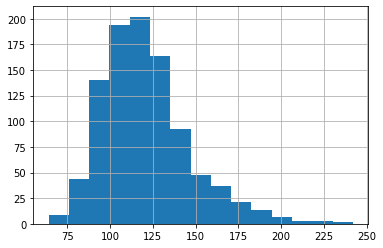

In [15]:
movies.duration.hist(bins=15)

<AxesSubplot:>

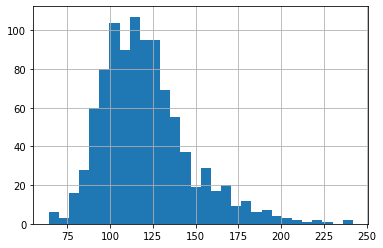

In [16]:
movies.duration.hist(bins=30) #data is seen to be right skewed more clearly here
#more bins helps as we can see the distribution in each bracket more clearly
#i.e. high count of movies in early 100 and mid-100 duration brackets

#### Use a box plot to display that same data.

<AxesSubplot:>

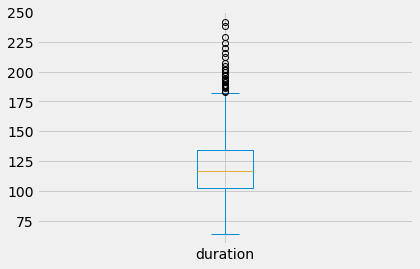

In [17]:
# Answer:
plt.style.use('fivethirtyeight')
movies['duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [18]:
# Answer:
movies.content_rating.value_counts() #solution below shows there are no dup rows on title

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [19]:
# Optional exploration:
movies_types = movies.groupby(['genre','content_rating']).title.agg(['count'])
pd.set_option('display.max_rows', None)
movies_types

count
genre     content_rating       
Action    APPROVED            3
          G                   1
          GP                  1
          NOT RATED           4
          PASSED              1
          PG                 11
          PG-13              44
          R                  67
          UNRATED             3
Adventure APPROVED            3
          G                   2
          NOT RATED           5
          PASSED              1
          PG                 21
          PG-13              23
          R                  17
          UNRATED             2
Animation APPROVED            3
          G                  20
          NOT RATED           3
          PG                 25
          PG-13               5
          R                   5
          UNRATED             1
Biography APPROVED            1
          G                   2
          GP                  1
          NOT RATED           1
          PG                  6
          PG-13              29
          R                  36
Comedy    APPROVED            9
          G                   2
          GP                  1
          NC-17               1
          NOT RATED          16
          PASSED              3
          PG                 23
          PG-13              23
          R                  73
          UNRATED             4
          X                   1
Crime     APPROVED            6
          NC-17               1
          NOT RATED           7
          PASSED              1
          PG                  6
          PG-13               4
          R                  87
          UNRATED            11
          X                   1
Drama     APPROVED           12
          G                   3
          NC-17               4
          NOT RATED          24
          PASSED              1
          PG                 25
          PG-13              55
          R                 143
          TV-MA               1
          UNRATED             9
          X                   1
Family    G                   1
          PG                  1
Fantasy   R                   1
Film-Noir APPROVED            1
          NOT RATED           1
          UNRATED             1
History   UNRATED             1
Horror    APPROVED            2
          NC-17               1
          NOT RATED           1
          PG                  1
          PG-13               2
          R                  16
          UNRATED             5
          X                   1
Mystery   APPROVED            4
          G                   1
          NOT RATED           1
          PG                  1
          PG-13               2
          R                   6
          UNRATED             1
Sci-Fi    APPROVED            1
          PG-13               1
          R                   3
Thriller  APPROVED            1
          PG                  1
          R                   3
Western   APPROVED            1
          NOT RATED           2
          PG                  2
          PG-13               1
          R                   3

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 0, 'Ratings Category')

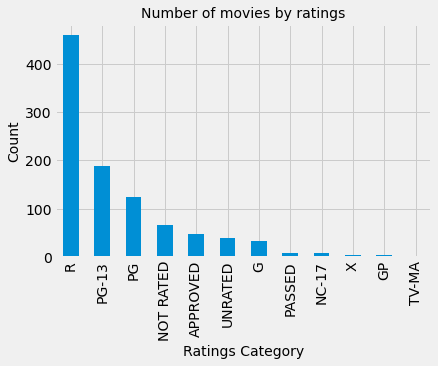

In [20]:
# Answer:
movies_ratings=movies.content_rating.value_counts().plot(kind='bar')
movies_ratings.set_title('Number of movies by ratings',fontsize=14)
movies_ratings.set_ylabel('Count', fontsize=14)
movies_ratings.set_xlabel('Ratings Category', fontsize=14)

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [21]:
movies['content_rating'].replace({"NOT RATED": "UNRATED","APPROVED": "UNRATED","PASSED": "UNRATED","GP": "UNRATED"},inplace=True)
movies.content_rating.value_counts()

#print(65+47+7+3+38)

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [22]:
# Answer:
movies['content_rating'].replace({"X": "NC-17","TV-MA":"NC-17"},inplace=True)
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [23]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [24]:
# Answer:
movies.content_rating.value_counts(dropna=False)

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
NaN          3
Name: content_rating, dtype: int64

In [25]:
movies[movies.content_rating.isnull()].head()

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."


In [26]:
movies.content_rating.fillna(value='UNRATED', inplace=True)
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    163
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [27]:
# Answer:
mask1=(movies.duration>=120)
mask2=(movies.duration<120)
movies[mask1].star_rating.mean()

7.948898678414094

In [28]:
movies[mask2].star_rating.mean()

7.838666666666663

#### Use a visualization to detect whether there is a relationship between duration and star rating.

<AxesSubplot:xlabel='star_rating', ylabel='duration'>

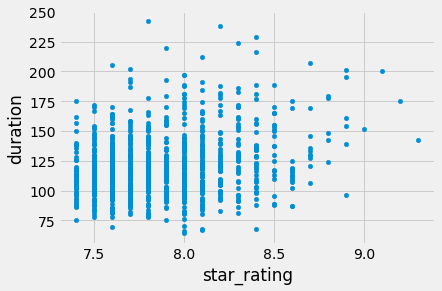

In [29]:
# Answer:
movies.plot(kind='scatter', x='star_rating', y='duration')

#### Calculate the average duration for each genre.

In [30]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

<AxesSubplot:xlabel='content_rating', ylabel='duration'>

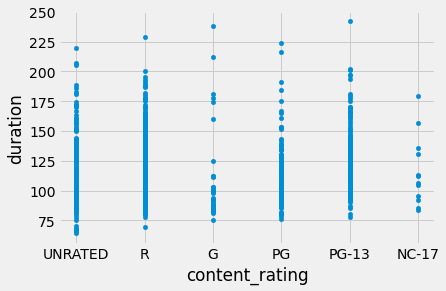

In [31]:
# Answer:
movies.plot(kind='scatter', x='content_rating', y='duration')

#### Determine the top rated movie (by star rating) for each genre.

In [32]:
# Answer: Top star rating and title, for each genre
movies.groupby('genre')['star_rating','title'].max()

/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_46145/1886562239.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  movies.groupby('genre')['star_rating','title'].max()


,star_rating,title
genre,,
Action,9.0,Yojimbo
Adventure,8.9,True Grit
Animation,8.6,Wreck-It Ralph
Biography,8.9,Walk the Line
Comedy,8.6,Zombieland
Crime,9.3,Zodiac
Drama,8.9,Zulu
Family,7.9,Willy Wonka & the Chocolate Factory
Fantasy,7.7,The City of Lost Children


In [33]:
#check if table above is correct
movies.groupby('genre').star_rating.max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [39]:
# Answer: Filtering for list of movie titles that may be duplicated
fil2 = movies.title.value_counts()
fil3 = fil2.to_frame()
fil4=fil3[fil3['title']>1]
fil4.index

Index(['Les Miserables', 'Dracula', 'True Grit',
       'The Girl with the Dragon Tattoo'],
      dtype='object')

In [40]:
movies.loc[movies['title'].isin(fil4.index)].sort_values(by='title').head(10)

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


CONCLUSION: The above are not duplicates, as despite the same title, both records of the same title has different set of actors. They are possibly remakes of the same movie in a different language

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


In [210]:
val=movies.genre.value_counts()
val1=val.to_frame()
val1.rename(columns={'value_count':'genre'},inplace=True)
val2=val1[val1['genre']>10]
val2.index

Index(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Mystery'],
      dtype='object')

In [214]:
val1

,genre
Drama,278
Comedy,156
Action,136
Crime,124
Biography,77
Adventure,75
Animation,62
Horror,29
Mystery,16
Western,9


In [215]:
val2

,genre
Drama,278
Comedy,156
Action,136
Crime,124
Biography,77
Adventure,75
Animation,62
Horror,29
Mystery,16


In [212]:
movies['Genre_10']=movies.genre.isin(val2.index)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,Genre_10
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...",True
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G...",False
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric...",True
293,8.1,Duck Soup,UNRATED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']",True
88,8.4,The Kid,UNRATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack...",True


In [213]:
mask3=(movies.Genre_10==True)
movies[mask3].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

## Bonus

#### Figure out something "interesting" using the actors data!